1. Install the necessary packages
2. Import you data and perform basic data exploration phase
    1. Display general information about the dataset
    2. Create a pandas profiling reports to gain insights into the dataset
    3. Handle Missing and corrupted values
    4. Remove duplicates, if they exist
    5. Handle outliers, if they exist
    6. Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally)
5. Add input fields for your features and a validation button at the end of the form
6. Import your ML model into the streamlit application and start making predictions given the provided features values

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
data = pd.read_csv("Expresso_churn_dataset.csv")
df = data.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [15]:
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [16]:
df.dropna(axis= 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 2153831
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10839 non-null  object 
 1   REGION          10839 non-null  object 
 2   TENURE          10839 non-null  object 
 3   MONTANT         10839 non-null  float64
 4   FREQUENCE_RECH  10839 non-null  float64
 5   REVENUE         10839 non-null  float64
 6   ARPU_SEGMENT    10839 non-null  float64
 7   FREQUENCE       10839 non-null  float64
 8   DATA_VOLUME     10839 non-null  float64
 9   ON_NET          10839 non-null  float64
 10  ORANGE          10839 non-null  float64
 11  TIGO            10839 non-null  float64
 12  ZONE1           10839 non-null  float64
 13  ZONE2           10839 non-null  float64
 14  MRG             10839 non-null  object 
 15  REGULARITY      10839 non-null  int64  
 16  TOP_PACK        10839 non-null  object 
 17  FREQ_TOP_PACK   10839 non-nul

In [17]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000
mean,16442.895931,27.111818,16732.591106,5577.532152,33.330012,7301.918350,432.547837,234.347357,36.493680,9.877203,9.285451,55.306394,18.780054,0.001476
std,13816.040978,19.025954,13975.663695,4658.554268,19.076706,12869.651518,1117.130791,348.501459,86.058411,49.879415,29.901377,10.060160,20.025398,0.038394
min,200.000000,1.000000,198.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,7800.000000,12.000000,7998.000000,2666.000000,18.000000,4.000000,19.000000,38.000000,3.000000,0.000000,0.000000,52.000000,6.000000,0.000000
50%,13000.000000,23.000000,13352.000000,4451.000000,30.000000,2082.000000,88.000000,116.000000,11.000000,1.000000,2.000000,60.000000,13.000000,0.000000
75%,20900.000000,38.000000,21217.000000,7072.500000,45.000000,9562.000000,354.000000,296.000000,35.000000,4.000000,6.000000,62.000000,25.000000,0.000000
max,235000.000000,131.000000,226150.000000,75383.000000,91.000000,201413.000000,19950.000000,5543.000000,2144.000000,1609.000000,1324.000000,62.000000,560.000000,1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def transformer(dataframe):
    lb = LabelEncoder()
    scaler = MinMaxScaler()

    dep = dataframe.drop('CHURN', axis=1)

    for i in dep.columns:
        if i in dataframe.select_dtypes(include='number').columns:
            # Scale only numerical columns
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
        elif i in dataframe.select_dtypes(include=['object', 'category']).columns:
            # Label encode categorical columns
            dataframe[i] = lb.fit_transform(dataframe[i])

    return dataframe


transformer(df)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,0,2,7,0.017249,0.107692,0.017937,0.017938,0.177778,0.000020,0.019449,0.008299,0.000466,0.000622,0.001511,0,0.868852,51,0.012522,0
37,1,0,7,0.043441,0.176923,0.047364,0.047360,0.277778,0.058661,0.000602,0.010644,0.001399,0.000000,0.000755,0,0.868852,21,0.012522,0
170,2,0,7,0.011925,0.038462,0.012396,0.012401,0.066667,0.002557,0.000752,0.000000,0.000000,0.000000,0.000000,0,0.934426,21,0.007156,0
561,3,12,7,0.010860,0.038462,0.011286,0.011286,0.055556,0.000000,0.001654,0.000180,0.010261,0.000000,0.006042,0,0.622951,47,0.000000,0
635,4,0,7,0.048978,0.153846,0.055321,0.055326,0.355556,0.000010,0.008521,0.044922,0.006996,0.003729,0.002266,0,1.000000,7,0.028623,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152712,10834,0,7,0.050681,0.207692,0.050732,0.050732,0.266667,0.000000,0.010226,0.039329,0.016791,0.000000,0.000755,0,0.918033,33,0.012522,0
2153142,10835,8,5,0.011925,0.084615,0.012352,0.012348,0.188889,0.022789,0.000150,0.008660,0.002799,0.000000,0.000000,0,0.639344,17,0.008945,0
2153483,10836,0,7,0.050256,0.053846,0.050192,0.050188,0.088889,0.045573,0.070426,0.069277,0.019590,0.000000,0.001511,0,0.983607,37,0.003578,0
2153547,10837,0,7,0.061329,0.200000,0.068160,0.068165,0.311111,0.000000,0.001604,0.054844,0.006063,0.001243,0.001511,0,0.836066,7,0.048301,0


In [19]:
df.reset_index(drop=True)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,0,2,7,0.017249,0.107692,0.017937,0.017938,0.177778,0.000020,0.019449,0.008299,0.000466,0.000622,0.001511,0,0.868852,51,0.012522,0
1,1,0,7,0.043441,0.176923,0.047364,0.047360,0.277778,0.058661,0.000602,0.010644,0.001399,0.000000,0.000755,0,0.868852,21,0.012522,0
2,2,0,7,0.011925,0.038462,0.012396,0.012401,0.066667,0.002557,0.000752,0.000000,0.000000,0.000000,0.000000,0,0.934426,21,0.007156,0
3,3,12,7,0.010860,0.038462,0.011286,0.011286,0.055556,0.000000,0.001654,0.000180,0.010261,0.000000,0.006042,0,0.622951,47,0.000000,0
4,4,0,7,0.048978,0.153846,0.055321,0.055326,0.355556,0.000010,0.008521,0.044922,0.006996,0.003729,0.002266,0,1.000000,7,0.028623,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,10834,0,7,0.050681,0.207692,0.050732,0.050732,0.266667,0.000000,0.010226,0.039329,0.016791,0.000000,0.000755,0,0.918033,33,0.012522,0
10835,10835,8,5,0.011925,0.084615,0.012352,0.012348,0.188889,0.022789,0.000150,0.008660,0.002799,0.000000,0.000000,0,0.639344,17,0.008945,0
10836,10836,0,7,0.050256,0.053846,0.050192,0.050188,0.088889,0.045573,0.070426,0.069277,0.019590,0.000000,0.001511,0,0.983607,37,0.003578,0
10837,10837,0,7,0.061329,0.200000,0.068160,0.068165,0.311111,0.000000,0.001604,0.054844,0.006063,0.001243,0.001511,0,0.836066,7,0.048301,0


In [20]:
df.describe()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
count,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.0,10839.000000,10839.000000,10839.000000,10839.000000
mean,5419.000000,3.123535,6.872128,0.069178,0.200860,0.073177,0.073178,0.359222,0.036253,0.021682,0.042278,0.017021,0.006139,0.007013,0.0,0.890269,23.224375,0.031807,0.001476
std,3129.094118,4.563303,0.644849,0.058842,0.146353,0.061852,0.061853,0.211963,0.063897,0.055997,0.062872,0.040139,0.031000,0.022584,0.0,0.164921,18.067956,0.035824,0.038394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2709.500000,0.000000,7.000000,0.032368,0.084615,0.034521,0.034521,0.188889,0.000020,0.000952,0.006855,0.001399,0.000000,0.000000,0.0,0.836066,7.000000,0.008945,0.000000
50%,5419.000000,0.000000,7.000000,0.054514,0.169231,0.058216,0.058221,0.322222,0.010337,0.004411,0.020927,0.005131,0.000622,0.001511,0.0,0.967213,17.000000,0.021467,0.000000
75%,8128.500000,7.000000,7.000000,0.088160,0.284615,0.093024,0.093027,0.488889,0.047475,0.017744,0.053401,0.016325,0.002486,0.004532,0.0,1.000000,37.000000,0.042934,0.000000
max,10838.000000,13.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,67.000000,1.000000,1.000000


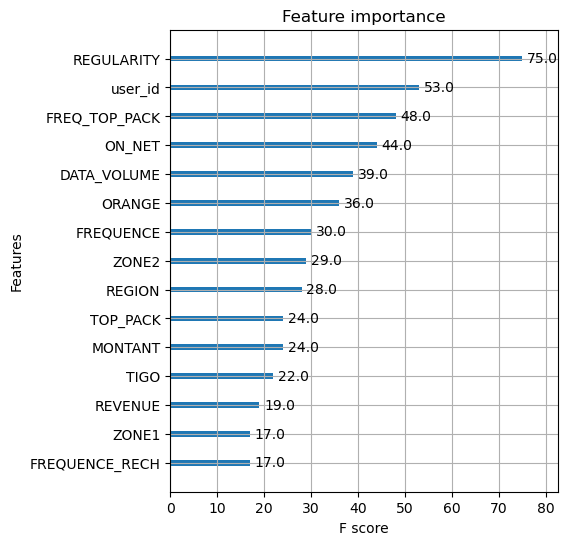

In [21]:
import xgboost as xgb

X = df.drop('CHURN', axis = 1)
Y = df.CHURN

xg_model = xgb.XGBClassifier()
xg_model.fit(X,Y)

plt.rcParams['figure.figsize'] = (5, 6)
xgb.plot_importance(xg_model, importance_type= 'weight')
plt.show()

In [22]:
# ANOVA F-value between label/feature

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(X,Y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(X.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(10, 'F_classif_score')
k1.reset_index(drop = True, inplace = True)

k1.sort_values(by = 'F_classif_score', ascending = False)

c:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Feature,F_classif_score
0,REGULARITY,74.499611
1,FREQUENCE,3.681233
2,FREQ_TOP_PACK,3.080895
3,FREQUENCE_RECH,2.278669
4,user_id,1.582252
5,MONTANT,1.338394
6,REVENUE,1.314680
7,ARPU_SEGMENT,1.314520
8,DATA_VOLUME,1.125207
9,ORANGE,0.538852


In [23]:
features = df[['REGULARITY','CHURN','FREQ_TOP_PACK','FREQUENCE']]

In [24]:
x = features.drop('CHURN',axis = 1)
y = features.CHURN

In [25]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.20, random_state=999, stratify=y)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier()

# You can then fit the rf_model to your data and use it for classification tasks
# For example, assuming you have training data X_train and corresponding labels y_train:
rf_model.fit(xtrain, ytrain)

# After training, you can make predictions
y_pred = rf_model.predict(xtest)
rf_score = accuracy_score(y_pred, ytest)
rf_score

y_t = rf_model.predict(xtrain)
score = accuracy_score(y_t, ytrain)

print(classification_report(y_t, ytrain))
print(rf_score)
print(score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8659
           1       0.92      1.00      0.96        12

    accuracy                           1.00      8671
   macro avg       0.96      1.00      0.98      8671
weighted avg       1.00      1.00      1.00      8671

0.9986162361623616
0.9998846730480914


In [27]:
confusion_matrix(y_t, ytrain)

array([[8658,    1],
       [   0,   12]], dtype=int64)

In [28]:
import joblib

joblib.dump(rf_model,'model.pkl')

['model.pkl']

In [41]:
for column in data:
    if column in features:
        display(pd.DataFrame(data[column].head()))


,FREQUENCE
0,17.0
1,NaN
2,2.0
3,18.0
4,1.0


,REGULARITY
0,54
1,4
2,17
3,62
4,11


,FREQ_TOP_PACK
0,8.0
1,NaN
2,1.0
3,11.0
4,2.0


,CHURN
0,0
1,1
2,0
3,0
4,0


In [42]:
%pip install streamlit-toggle-switch

     ------------------------------------ 635.4/635.4 kB 272.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
